# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# added:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [3]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [4]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [5]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [6]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

This function takes the text and removes numbers, leading and trailing spaces and replaces multiple whitespaces with a single space.

In [10]:
def handle_text(text):
    text = re.sub(r'\d', '', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

The gender column needs to become numeric in order to process it with a ML model, so I added a new column named 'gender_num'.
Also used the function handle text for preproccesing.

In [11]:
# Add as many code cells as you need
# YOUR CODE HERE

def handle_train(df):
    # preprocess the text
    df['story'] = df ['story'].apply(handle_text)
    
    # fit and transform the gender column to numeric values
    le = LabelEncoder()
    df['gender_num'] = le.fit_transform(df['gender'])
    
    # got X_train and y_train
    X_train = df.story
    y_train = df.gender_num
    
    return X_train, y_train
    

In [12]:
models_list = {
    'knn': KNeighborsClassifier(),
    'randomForest': RandomForestClassifier(),
    'decisionTree': DecisionTreeClassifier(),
    'linearSVC':LinearSVC(),
    'neuralNetwork':MLPClassifier(),
    'perceptron':Perceptron(),
    'sgd':SGDClassifier()
}

params_list = {
    'knn': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'randomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'decisionTree': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'linearSVC': {'C': [0.1, 1, 10]},
    'neuralNetwork': {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'logistic'], 'solver': ['adam', 'sgd']},
    'perceptron': {'alpha': [0.1, 0.01, 0.001, 0.005]},
    'sgd': {'alpha': [0.1, 0.01, 0.001, 0.005]}
}

Do a grid search that checks the best parameters, vectorizer and normalization.

In [13]:
def perform_grid_search(models_list, params_list, X, y):
    # Define the scoring metric
    scoring = make_scorer(f1_score, average='macro')

    for model_name, model in models_list.items():
        params = params_list[model_name]

        # Define the vectorizers to try
        vectorizers = [
            ('tfidf', TfidfVectorizer()),
            ('count', CountVectorizer())
        ]

        # Perform grid search with different vectorizers and normalization options
        for vec_name, vectorizer in vectorizers:
            # Create the feature vectors with the vectorizer
            X_features = vectorizer.fit_transform(X)
            # Apply normalization to the feature vectors
            X_features = preprocessing.normalize(X_features, norm='l2')
            # Create the grid search object
            grid_search = GridSearchCV(model, params, cv=10, scoring=scoring)
            # Fit the grid search to the data
            grid_search.fit(X_features, y)
                
            # Print the best parameters and score
            print(f"Model: {model_name}, Vectorizer: {vec_name}")
            print("Best Parameters:", grid_search.best_params_)
            print("Best F1-macro Score:", grid_search.best_score_)
            
            # Evaluate the model on the train data
            y_pred = grid_search.predict(X_features)
            print("Classification Report:")
            print(classification_report(y, y_pred))
            print("-------------------------------------------")

Do preprocessing on the data and start grid search:

In [14]:
X_train, y_train = handle_train(df_train)
perform_grid_search(models_list, params_list, X_train, y_train)

Model: knn, Vectorizer: tfidf
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best F1-macro Score: 0.6157000979582263
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       1.00      1.00      1.00       575

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753

-------------------------------------------
Model: knn, Vectorizer: count
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best F1-macro Score: 0.5588677277755734
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       1.00      1.00      1.00       575

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753

Now we can continue with the model that gave us the best results- the Perceptron. We will add parameters to the TfidfVectorizer to try and make the f1_score even higher:

In [51]:
model = Perceptron(alpha=0.1)
vec = TfidfVectorizer(ngram_range=(1,1), max_features=10000, min_df=10)
X_features = vec.fit_transform(X_train)
X_train_normalized = preprocessing.normalize(X_features, norm='l2')
clf = model.fit(X_train_normalized, y_train)

In [52]:
predicted_train = clf.predict(X_train_normalized)
cv_scores = cross_val_score(clf, X_train_normalized, y_train, scoring="f1_macro", cv=10)
mean_f1 = cv_scores.mean()
print("Mean f1_macro score:",mean_f1)

Mean f1_macro score: 0.6654750881361504


Lets try and scale the data to see if it improves the result:

In [56]:
model_scaled = Perceptron(alpha=0.1)
vec = TfidfVectorizer(ngram_range=(1,1), max_features=10000, min_df=10)
X_features = vec.fit_transform(X_train)
X_train_normalized = preprocessing.normalize(X_features, norm='l2')
# Apply scaling using StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_normalized)
clf_scaled = model_scaled.fit(X_train_scaled, y_train)

In [57]:
predicted_train = clf_scaled.predict(X_train_scaled)
cv_scores = cross_val_score(clf_scaled, X_train_scaled, y_train, scoring="f1_macro", cv=10)
mean_f1 = cv_scores.mean()
print("Mean f1_macro score:",mean_f1)

Mean f1_macro score: 0.6717591576858863


We got an even better result with adding some parameters to the TF-IDF vectorizer and scaling the data. and the f1_macro score is now 0.67 .

Here is the confusion matrix:

In [58]:
pd.DataFrame(confusion_matrix(y_pred = predicted_train, y_true = y_train), index = ['Female', 'Male'], columns = ['Female', 'Male'])

,Female,Male
Female,178,0
Male,2,573


Now we can handle the test data:

In [59]:
df_test['story'] = df_test['story'].apply(handle_text)

X_test = df_test.story

# Preprocess the test set using the same vectorizer and then l2 normaliztion and scaling
X_test_features = vec.transform(X_test)
X_test_normalized = preprocessing.normalize(X_test_features, norm='l2')
X_test_scaled = scaler.fit_transform(X_test_normalized)

# Predict labels for the test set
predicted_test = clf_scaled.predict(X_test_scaled)


Change the predicted categories to 'm' and 'f', then create the dataframe with the results.

In [60]:
predicted_categories = ['m' if pred == 1 else 'f' for pred in predicted_test]

# Create a DataFrame with the test example IDs and predicted categories
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'],
                               'predicted_category': predicted_categories})
df_predicted.head(5)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


In [61]:
df_predicted.tail(5)

,test_example_id,predicted_category
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


In [62]:
gender_counts = df_predicted['predicted_category'].value_counts()
gender_counts

m    258
f     65
Name: predicted_category, dtype: int64

([<matplotlib.patches.Wedge at 0x7faf2408a760>,
 [Text(-0.8873964901609296, 0.6500211298489175, 'm'),
  Text(0.8873964901609296, -0.6500211298489176, 'f')],
 [Text(-0.4840344491786888, 0.3545569799175913, '79.9%'),
  Text(0.4840344491786888, -0.35455697991759133, '20.1%')])

(-1.1005225782266468,
 1.1000248846774594,
 -1.1007871413441859,
 1.100301277388169)

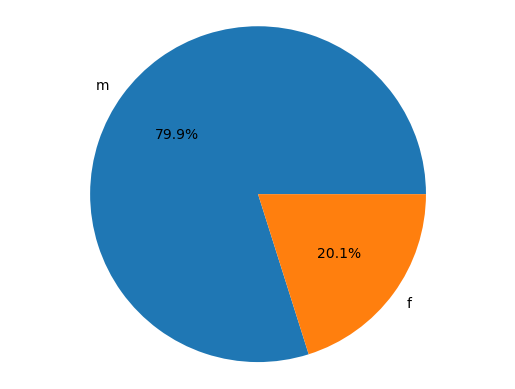

In [63]:
# visualize
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [64]:
df_predicted.to_csv('classification_results.csv',index=False)